# <span style="color:red"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 9 </span>

In questa esercitazione andremo ad applicare un *algoritmo genetico* (***GA***) al problema del commesso viaggiatore (***TSP***), per stimare il migliore percorso possibile, ovvero quello in cui si percorre la distanza minore.

### Esercizio 09.1
Nel problema del commesso viaggiatore è dato un insieme di $N$ città con posizione $\vec{x_i}$. Lo scopo è determinare quale sia il percorso più breve che il commesso può compiere, ovvero si vuole minimizzare la distanza percorsa. Le condizioni che si impongono al problema sono:

- Il commesso deve visitare tutte le città, ciascuna *una* volta sola, partendo da una di esse.
- Alla fine del percorso deve ritornare alla cità di partenza.

Per risolvere questo problema, ci basiamo sulla definizione di distanza come *norma* $L^{(2)}$:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

dove $\vec{x}_{N+1}=\vec{x}_1$ (una sorta di *condizioni periodiche al contorno*). Risolveremo il problema cercando di minimizzare questa quantità, data una certa permutazione $p$ dell'ordine con cui le città sono visitate. Dichiariamo quinid che la soluzione del problema è la sequenza ordinata di città che minimizzano la funzione costo definita sopra.

Adoperiamo per questo un *algoritmo genetico* ***GA***.

#### Algoritmo genetico
Il codice è composto da due classi:
- `individual` è una classe che rappresenta un possibile percorso; contiene un vettore di interi (l'ordine con cui si visitano le città) e dei vettori con le coordinate di ciascuna città. Sono anche definite delle funzioni di *mutazione* che modificano con una certa probabilità l'individuo, alterando l'ordine di visita.
- `population` è una classe che rappresenta un insieme di individui; si evolverà nel tempo secondo le regole del ***GA***, producendo ad ogni generazione nuovi individui che miglioreranno la stima del percorso migliore. E' definita la funzione *crosover* che permette la generazione di due nuovi individui figli dati due genitori. Di norma, ogni popolazione è ordinata in ordine crescente sulla base della distanza di ciascun individuo (gli individui più in basso sono i "migliori").

Il codice ***GA*** ripetta le condizioni del problema defnite sopra: città visitate tutte e una volta sola.

Le funzioni di *mutazione* vengono chiamate, non appena un individuo è generato, con una certa probabilità; esse sono:

- ***Permutazione***: due città di un individuo si scambiano di posto ( $p=10\%$ )
- ***Permutazione a gruppi***: due gruppi di città contigue si scambiano di posto ( $p=3\%$ )
- ***Shift***: la sequenza di città  viene spostata di un certo numero di posizioni ( $p=5\%$ )
- ***Inversione***: la sequenza di città viene invertita ( $p=1\%$ )

Il ***crossover*** avviene nel processo di generazione di nuovi individui: i due genitori vengono tagliati in una certa posizione, le prime parti sono copiate uguali nei due figli; le ultime sono ricostruite in base all'ordine con cui compaiono nel consorte.

Il ***crossover*** ha una probabilità $p=50\%$ di accadere; altrimenti, i figli sono copie esatte dei genitori.

Tutte le funzioni descritte non coinvolgono la prima città, che è sempre lasciata nella prima posizione; in questo modo la degenerazione del percorso è ridotta a $2$ (senso orario e antiorario).

Applichiamo il codice ad un ***TSP*** con $32$ città, distribuite su una circonferenza di raggio $1$ e all'interno di un quadrato di lato $1$. Evolviamo la popolazione composta di $200$ individui per $2000$ generazioni. Il codice parte da una configurazione casuale di città.

Riportiamo di seguito i risultati per il migliore percorso; riportiamo anche la stima di  $\langle L^{(1)}\rangle$, calcolato sullà metà milgiore (inferiore) della popolazione.

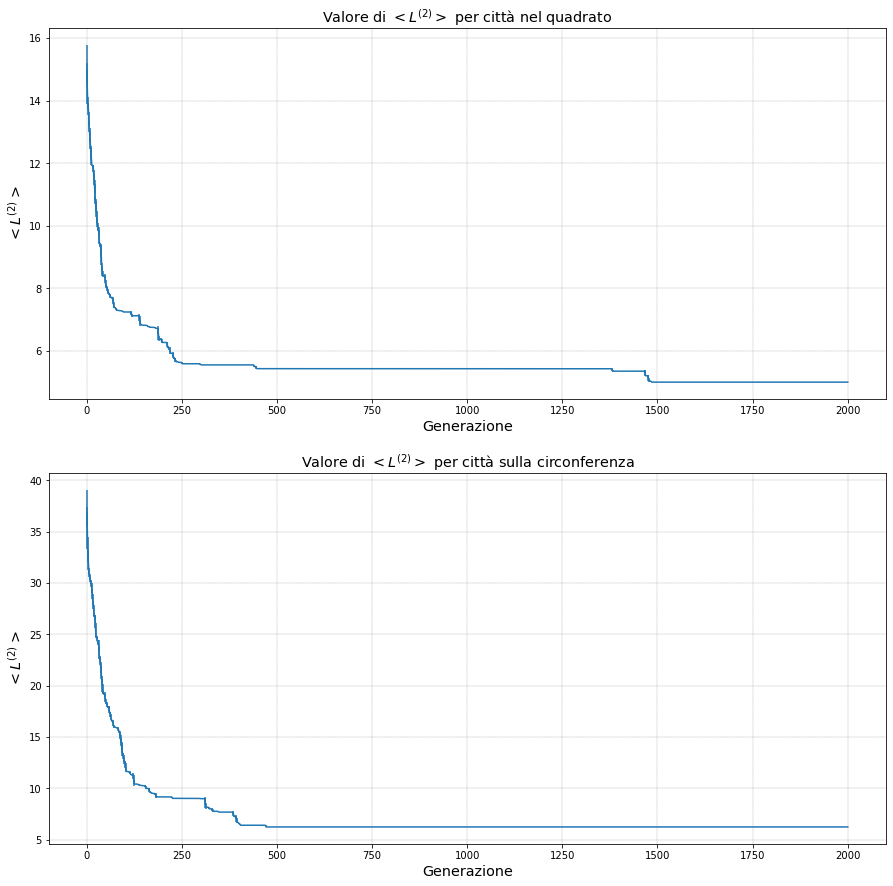

Valore di distanza media finale nel quadrato:  4.99196
Valore di distanza media finale sulla circonferenza:  6.24243


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

n_gen = 2000

# Average

fig1, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

# Square 
sq_gen, sq_ave, sq_err = np.loadtxt("09.1/Data/square_ave.out", unpack=True)

axs[0].errorbar(sq_gen, sq_ave, yerr=sq_err)
axs[0].set_title(r"Valore di $<L^{(2)}>$ per città nel quadrato", fontsize="x-large")
axs[0].set_xlabel("Generazione", fontsize="x-large")
axs[0].set_ylabel(r"$<L^{(2)}>$", fontsize="x-large")
axs[0].grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)


# Circumference
circ_gen, circ_ave, circ_err = np.loadtxt("09.1/Data/circle_ave.out", unpack=True)

axs[1].errorbar(sq_gen, circ_ave, yerr=circ_err)
axs[1].set_title(r"Valore di $<L^{(2)}>$ per città sulla circonferenza", fontsize="x-large")
axs[1].set_xlabel("Generazione", fontsize="x-large")
axs[1].set_ylabel(r"$<L^{(2)}>$", fontsize="x-large")
axs[1].grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

plt.show()

print("Valore di distanza media finale nel quadrato: ", sq_ave[n_gen-1])
print("Valore di distanza media finale sulla circonferenza: ", circ_ave[n_gen-1])

Nel caso del quadrato, un valore stabile è raggiunto in più tempo rispetto al caso della circonferenza. 

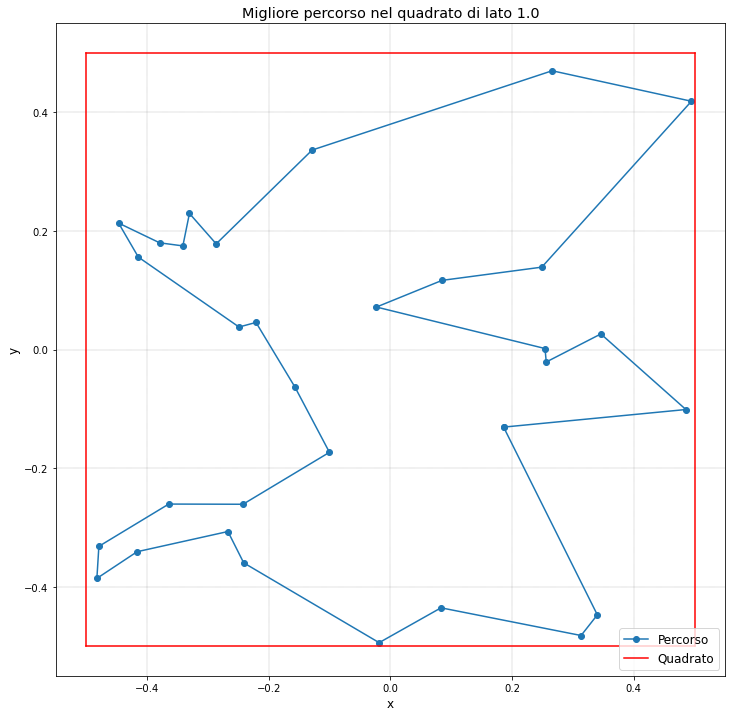

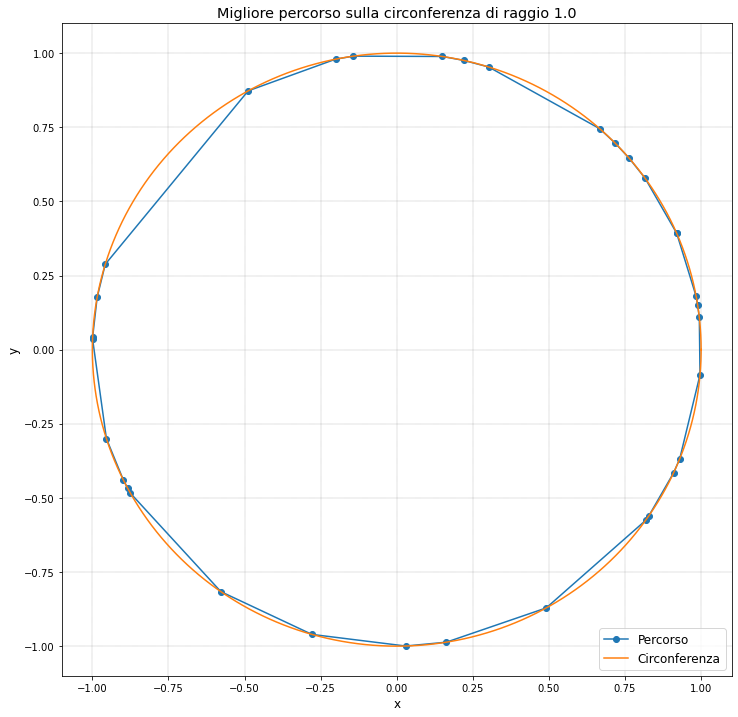

In [39]:
# Best path

fig2, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# Square
side = 1.
N = 100

sq_city, sq_x, sq_y = np.loadtxt("09.1/Data/square_best.out", unpack=True)

ax1.plot(sq_x, sq_y,'-o',label='Percorso')

#Square Frame
x_left = np.linspace(-side/2., side/2., N)
x_right = np.linspace(-side/2., side/2., N)
for i in range(N):
    x_left[i] = -side/2.
    x_right[i] = +side/2.
    
x = np.linspace(-side/2., side/2., 100)


ax1.plot(x,x_right,color='red', label="Quadrato")
ax1.plot(x_right,x,color='red')
ax1.plot(x_left,x,color='red')
ax1.plot(x,x_left,color='red')

ax1.set_title("Migliore percorso nel quadrato di lato "+str(side), fontsize="x-large")
ax1.set_xlabel("x",fontsize="large")
ax1.set_ylabel("y",fontsize="large")
ax1.legend(loc='lower right', fontsize="large")
ax1.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)



# Circumference
fig2, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

radius = 1.
N = 100

circ_city, circ_x, circ_y = np.loadtxt("09.1/Data/circle_best.out", unpack=True)

ax1.plot(circ_x, circ_y,'-o',label='Percorso')

#Circle frame
theta = np.linspace(0,2*np.pi,500)
x = radius*np.cos(theta)
y = radius*np.sin(theta)
ax1.plot(x,y,label='Circonferenza')

ax1.set_title("Migliore percorso sulla circonferenza di raggio "+str(radius), fontsize="x-large")
ax1.set_xlabel("x",fontsize="large")
ax1.set_ylabel("y",fontsize="large")
ax1.legend(loc='lower right', fontsize="large")
ax1.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

plt.show()
